In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

Observe Measurement Table

In [4]:
# Inspect column names within Measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == "6").\
    order_by(Measurement.date).all()
june_temp

[(78.0,),
 (74.0,),
 (73.0,),
 (77.0,),
 (69.0,),
 (76.0,),
 (71.0,),
 (74.0,),
 (70.0,),
 (76.0,),
 (76.0,),
 (72.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (71.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (74.0,),
 (77.0,),
 (67.0,),
 (76.0,),
 (72.0,),
 (78.0,),
 (73.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (70.0,),
 (73.0,),
 (72.0,),
 (74.0,),
 (68.0,),
 (77.0,),
 (74.0,),
 (72.0,),
 (73.0,),
 (78.0,),
 (76.0,),
 (79.0,),
 (79.0,),
 (78.0,),
 (75.0,),
 (75.0,),
 (73.0,),
 (77.0,),
 (77.0,),
 (79.0,),
 (74.0,),
 (77.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (77.0,),
 (71.0,),
 (69.0,),
 (75.0,),
 (78.0,),
 (75.0,),
 (75.0,),
 (79.0,),
 (77.0,),
 (73.0,),
 (77.0,),
 (71.0,),
 (78.0,),
 (75.0,),
 (73.0,),
 (79.0,),
 (72.0,),
 (78.0,),
 (73.0,),
 (80.0,),
 (75.0,),
 (79.0,),
 (75.0,),
 (75.0,),
 (77.0,),
 (72.0,),
 (78.0,),
 (75.0,),
 (75.0,),
 (78.0,),
 (83.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (81.0,),
 (75.0,),
 (78.0,),
 (75.0,),
 (74.0,),
 (70.0,),
 (76.0,),
 (74.0,),
 (78.0,),
 (78.0,),


In [7]:
#  3. Convert the June temperatures to a list.
june_temp_list = list(np.ravel(june_temp))
june_temp_list

[78.0,
 74.0,
 73.0,
 77.0,
 69.0,
 76.0,
 71.0,
 74.0,
 70.0,
 76.0,
 76.0,
 72.0,
 76.0,
 70.0,
 76.0,
 71.0,
 76.0,
 78.0,
 78.0,
 75.0,
 74.0,
 77.0,
 67.0,
 76.0,
 72.0,
 78.0,
 73.0,
 76.0,
 75.0,
 73.0,
 75.0,
 70.0,
 73.0,
 72.0,
 74.0,
 68.0,
 77.0,
 74.0,
 72.0,
 73.0,
 78.0,
 76.0,
 79.0,
 79.0,
 78.0,
 75.0,
 75.0,
 73.0,
 77.0,
 77.0,
 79.0,
 74.0,
 77.0,
 75.0,
 74.0,
 76.0,
 77.0,
 71.0,
 69.0,
 75.0,
 78.0,
 75.0,
 75.0,
 79.0,
 77.0,
 73.0,
 77.0,
 71.0,
 78.0,
 75.0,
 73.0,
 79.0,
 72.0,
 78.0,
 73.0,
 80.0,
 75.0,
 79.0,
 75.0,
 75.0,
 77.0,
 72.0,
 78.0,
 75.0,
 75.0,
 78.0,
 83.0,
 76.0,
 77.0,
 76.0,
 81.0,
 75.0,
 78.0,
 75.0,
 74.0,
 70.0,
 76.0,
 74.0,
 78.0,
 78.0,
 76.0,
 74.0,
 78.0,
 79.0,
 77.0,
 77.0,
 73.0,
 73.0,
 74.0,
 70.0,
 71.0,
 76.0,
 78.0,
 74.0,
 73.0,
 76.0,
 73.0,
 75.0,
 69.0,
 76.0,
 78.0,
 74.0,
 76.0,
 77.0,
 76.0,
 70.0,
 74.0,
 73.0,
 77.0,
 75.0,
 75.0,
 76.0,
 75.0,
 75.0,
 72.0,
 78.0,
 73.0,
 77.0,
 70.0,
 70.0,
 73.0,
 70.0,
 73.0,

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns = ['June Temps'])
june_temp_df

,June Temps
0,78.0
1,74.0
2,73.0
3,77.0
4,69.0
...,...
1695,81.0
1696,74.0
1697,75.0
1698,76.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == "12").\
    order_by(Measurement.date).all()
dec_temp

[(76.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (78.0,),
 (72.0,),
 (70.0,),
 (71.0,),
 (72.0,),
 (73.0,),
 (75.0,),
 (71.0,),
 (74.0,),
 (71.0,),
 (74.0,),
 (70.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (70.0,),
 (74.0,),
 (72.0,),
 (74.0,),
 (67.0,),
 (74.0,),
 (74.0,),
 (72.0,),
 (78.0,),
 (74.0,),
 (75.0,),
 (77.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (78.0,),
 (66.0,),
 (69.0,),
 (69.0,),
 (64.0,),
 (66.0,),
 (64.0,),
 (66.0,),
 (78.0,),
 (61.0,),
 (61.0,),
 (65.0,),
 (61.0,),
 (64.0,),
 (64.0,),
 (71.0,),
 (66.0,),
 (76.0,),
 (69.0,),
 (58.0,),
 (66.0,),
 (62.0,),
 (67.0,),
 (66.0,),
 (62.0,),
 (67.0,),
 (73.0,),
 (65.0,),
 (60.0,),
 (68.0,),
 (63.0,),
 (77.0,),
 (75.0,),
 (70.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (71.0,),
 (77.0,),
 (73.0,),
 (66.0,),
 (65.0,),
 (64.0,),
 (68.0,),
 (63.0,),
 (67.0,),
 (65.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (69.0,),
 (64.0,),
 (72.0,),
 (69.0,),
 (72.0,),
 (72.0,),
 (67.0,),
 (68.0,),
 (71.0,),
 (70.0,),
 (75.0,),
 (70.0,),
 (65.0,),
 (69.0,),
 (68.0,),
 (69.0,),


In [11]:
# 7. Convert the December temperatures to a list.
dec_temp_list = list(np.ravel(dec_temp))
dec_temp_list

[76.0,
 73.0,
 73.0,
 72.0,
 78.0,
 72.0,
 70.0,
 71.0,
 72.0,
 73.0,
 75.0,
 71.0,
 74.0,
 71.0,
 74.0,
 70.0,
 74.0,
 73.0,
 71.0,
 70.0,
 74.0,
 72.0,
 74.0,
 67.0,
 74.0,
 74.0,
 72.0,
 78.0,
 74.0,
 75.0,
 77.0,
 73.0,
 71.0,
 73.0,
 78.0,
 66.0,
 69.0,
 69.0,
 64.0,
 66.0,
 64.0,
 66.0,
 78.0,
 61.0,
 61.0,
 65.0,
 61.0,
 64.0,
 64.0,
 71.0,
 66.0,
 76.0,
 69.0,
 58.0,
 66.0,
 62.0,
 67.0,
 66.0,
 62.0,
 67.0,
 73.0,
 65.0,
 60.0,
 68.0,
 63.0,
 77.0,
 75.0,
 70.0,
 76.0,
 74.0,
 77.0,
 71.0,
 77.0,
 73.0,
 66.0,
 65.0,
 64.0,
 68.0,
 63.0,
 67.0,
 65.0,
 65.0,
 64.0,
 69.0,
 69.0,
 64.0,
 72.0,
 69.0,
 72.0,
 72.0,
 67.0,
 68.0,
 71.0,
 70.0,
 75.0,
 70.0,
 65.0,
 69.0,
 68.0,
 69.0,
 70.0,
 69.0,
 75.0,
 67.0,
 68.0,
 66.0,
 80.0,
 71.0,
 78.0,
 69.0,
 71.0,
 74.0,
 71.0,
 67.0,
 74.0,
 71.0,
 74.0,
 74.0,
 72.0,
 70.0,
 72.0,
 74.0,
 71.0,
 66.0,
 73.0,
 67.0,
 68.0,
 68.0,
 68.0,
 68.0,
 66.0,
 65.0,
 63.0,
 65.0,
 66.0,
 68.0,
 68.0,
 66.0,
 66.0,
 64.0,
 63.0,
 68.0,
 69.0,

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp_list, columns = ['December Temps'])
dec_temp_df

,December Temps
0,76.0
1,73.0
2,73.0
3,72.0
4,78.0
...,...
1512,66.0
1513,71.0
1514,72.0
1515,67.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Queries

### 1. Plot June Temps vs Dec Temps

In [29]:
# Matplotlib inline magic command, Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt

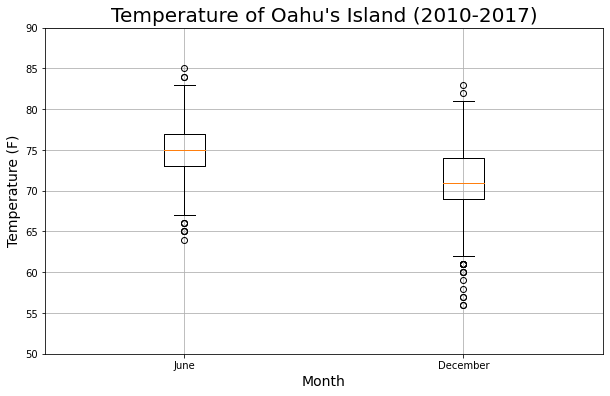

<Figure size 432x288 with 0 Axes>

In [32]:
x_labels = ["June", "December"]
temps_data = [june_temp_list, dec_temp_list]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Temperature of Oahu's Island (2010-2017)",fontsize=20)
ax.set_ylabel('Temperature (F)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)
ax.boxplot(temps_data, labels=x_labels)
ax.set_yticks(np.arange(50, 95, step=5.0))
ax.grid()
plt.show()
plt.savefig("Additional_Images/temps.png")

### 2. Precipitation data for June and December

In [14]:
# June precipitation data
june_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract("month", Measurement.date) == "6").\
    order_by(Measurement.date).all()

In [15]:
june_prcp_df = pd.DataFrame(june_prcp, columns = ['Date', 'June Precipitation']).set_index('Date')
june_prcp_df

,June Precipitation
Date,
2010-06-01,0.00
2010-06-01,0.03
2010-06-01,0.01
2010-06-01,0.00
2010-06-01,NaN
...,...
2017-06-30,0.00
2017-06-30,0.12
2017-06-30,0.07


In [16]:
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [17]:
# December precipitation data
dec_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract("month", Measurement.date) == "12").\
    order_by(Measurement.date).all()

In [18]:
dec_prcp_df = pd.DataFrame(dec_prcp, columns = ['Date', 'Dec Precipitation']).set_index('Date')
dec_prcp_df

,Dec Precipitation
Date,
2010-12-01,0.04
2010-12-01,0.76
2010-12-01,0.03
2010-12-01,0.70
2010-12-01,0.03
...,...
2016-12-31,0.01
2016-12-31,0.62
2016-12-31,0.36


In [30]:
dec_prcp_df.describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


### 3. Average Precipitation per Station for June and December

In [24]:
# June precipitation data per station
june_prcp_by_station = session.query(Measurement.station, func.avg(Measurement.prcp)).\
    filter(extract("month", Measurement.date) == "6").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

In [25]:
june_prcp_by_station_df = pd.DataFrame(june_prcp_by_station, columns = ['Station', 'June Avg Precipitation']).set_index('Station')
june_prcp_by_station_df

,June Avg Precipitation
Station,
USC00511918,0.015157
USC00513117,0.118248
USC00514830,0.114192
USC00516128,0.495748
USC00517948,0.057975
USC00518838,0.094615
USC00519281,0.151525
USC00519397,0.022661
USC00519523,0.050044


In [26]:
# December precipitation data per station
dec_prcp_by_station = session.query(Measurement.station, func.avg(Measurement.prcp)).\
    filter(extract("month", Measurement.date) == "12").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

In [27]:
dec_prcp_by_station_df = pd.DataFrame(dec_prcp_by_station, columns = ['Station', 'Dec Avg Precipitation']).set_index('Station')
dec_prcp_by_station_df

,Dec Avg Precipitation
Station,
USC00511918,0.138146
USC00513117,0.203241
USC00514830,0.154966
USC00516128,0.507005
USC00517948,0.152727
USC00518838,0.638182
USC00519281,0.244931
USC00519397,0.075314
USC00519523,0.162010


### June Temps (year 2010-2016)

In [20]:
new_june_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract("month", Measurement.date) == "6").\
    filter(extract("year", Measurement.date) < "2017").\
    order_by(Measurement.date).all()

In [33]:
new_june_temp_df = pd.DataFrame(new_june_temp, columns = ['Date', 'June Temps (no year 2017)'])

In [34]:
new_june_temp_df.describe()

,June Temps (no year 2017)
count,1509.000000
mean,74.656064
std,3.217007
min,64.000000
25%,72.000000
50%,75.000000
75%,77.000000
max,85.000000
